In [1]:
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# 要抓取的網址
url = "https://www.jpmarumaru.com/tw/JPSongPlay-7927.html"

# 發送GET請求獲取網頁內容
response = requests.get(url)

# 檢查請求是否成功
if response.status_code == 200:
    # 使用Beautiful Soup解析HTML
    soup = BeautifulSoup(response.text, "html.parser")
    
    # 在這裡進行解析並提取所需的資料
    # 例如，查找標題
    all_text = soup.get_text()
    #print(all_text)
else:
    print("無法獲取頁面，錯誤代碼:", response.status_code)

In [3]:
pattern = r'[\u3040-\u30FF]{3,}.+\n(?!.*\([^)]*\))[\u4E00-\u9FFFa-zA-Z]+.*'
matches = re.findall(pattern, all_text)
chinese_texts=[]
japanese_texts=[]

for match in matches:
    japanese_pattern =  r'[\u3040-\u30FF]{3,}.*'#將日文提取
    chinese_pattern =  r'[\u3040-\u30FF]{3,}.+\n(?!.*\([^)]*\))([\u4E00-\u9FFFa-zA-Z,.!?\'\"\s]+).*'#將中文提取
    japanese_text = re.findall(japanese_pattern, match)
    chinese_text = re.findall(chinese_pattern, match)
    japanese_texts.extend(japanese_text)
    chinese_texts.extend(chinese_text)

df = pd.DataFrame({'Japanese': japanese_texts, 'Chinese': chinese_texts})

# 显示 DataFrame
#print(dj)
print(df)
df.to_csv("output.csv", index=False, encoding="utf-16", sep='\t')

                                             Japanese  \
0   いつもどおりの通り独り こんな日々もはや懲り懲りいつもどおりのとおりひとり こんなひびもはや...   
1       もうどこにも行けやしないのに 夢見ておやすみもうどこにもいけやしないのに ゆめみておやすみ   
2   いつでも僕らはこんな風に ぼんくらな夜に飽き飽きいつでもぼくらはこんなふうに ぼんくらなよる...   
3                   うためにさよならまたおどりおどりだすあしたに であうためにさよなら   
4       ってやっとついた ここはどうだ楽園か?あるきまわってやっとついた ここはどうだらくえんか?   
5                          となっちゃもうわからないいまとなっちゃもうわからない   
6               のスーパースターが四はんせいきのけっかできた あおいかおのすーぱーすたーが   
7                               すかしては待ってるおなかすかしてはまってる   
8   アイムアルーザー どうせだったら遠吠えだっていいだろうあいむあるーざー どうせだったらとおぼ...   
9                     こうぜ 僕らの声もういっかいもういっかいいこうぜ ぼくらのこえ   
10          アイムアルーザー ずっと前から聞こえてたあいむあるーざー ずっとまえからきこえてた   
11                       いつかポケットに隠した声がいつかぽけっとにかくしたこえが   
12  ああだのこうだの知ったもんか 幸先の空は悪天候ああだのこうだのしったもんか さいさきのそらは...   
13                からすりゃ塵のようほらまどからのぞいたまてんろう からすりゃちりのよう   
14  イアンもカートも昔の人よ 中指立ててもしょうがないのいあんもかーともむかしのひとよ なかゆび...   
15        がるためのお勉強 朗らかな表情いまかちあがるためのおべんきょう ほがらかなひょうじょう   
16              らそれを端から笑う阿呆おどるあ

In [4]:
result = df.to_dict(orient='records')

print(result)

[{'Japanese': 'いつもどおりの通り独り こんな日々もはや懲り懲りいつもどおりのとおりひとり こんなひびもはやこりごり', 'Chinese': '一如往常的往常一人 如此度日也成折磨折磨'}, {'Japanese': 'もうどこにも行けやしないのに 夢見ておやすみもうどこにもいけやしないのに ゆめみておやすみ', 'Chinese': '早已是哪裡也去不了 就作個夢道聲晚安'}, {'Japanese': 'いつでも僕らはこんな風に ぼんくらな夜に飽き飽きいつでもぼくらはこんなふうに ぼんくらなよるにあきあき', 'Chinese': '我們總像這樣 對愚蠢的夜晚感到好膩好膩'}, {'Japanese': 'うためにさよならまたおどりおどりだすあしたに であうためにさよなら', 'Chinese': '為了迎接盡情起舞的明天 現在先說聲再見'}, {'Japanese': 'ってやっとついた ここはどうだ楽園か?あるきまわってやっとついた ここはどうだらくえんか?', 'Chinese': '四處閒晃終於抵達 這裡是哪是樂園嗎?'}, {'Japanese': 'となっちゃもうわからないいまとなっちゃもうわからない', 'Chinese': '事到如今什麼也不確定'}, {'Japanese': 'のスーパースターが四はんせいきのけっかできた あおいかおのすーぱーすたーが', 'Chinese': '用上四分之一世紀的結果公布了 面色蒼白的超級巨星'}, {'Japanese': 'すかしては待ってるおなかすかしてはまってる', 'Chinese': '餓著肚子在等待'}, {'Japanese': 'アイムアルーザー どうせだったら遠吠えだっていいだろうあいむあるーざー どうせだったらとおぼえだっていいだろう', 'Chinese': "I'm a LOSER 這樣的話在暗處吠叫也無所謂吧"}, {'Japanese': 'こうぜ 僕らの声もういっかいもういっかいいこうぜ ぼくらのこえ', 'Chinese': '再一次 再一次 前進吧 我們的聲音'}, {'Japanese': 'アイムアルーザー ずっと前から聞こえてたあいむあるーざー ずっとまえからきこえてた', 'Chinese': "I'm a LOSER 從好久以前開始就聽得見"}, 

In [5]:
df.to_json("output.json", orient='records')

In [6]:
import json

# 開啟 JSON 檔案
with open("output.json", "r", encoding="utf-8") as file:
    # 使用 json.load() 方法載入 JSON 檔案的內容
    data = json.load(file)

# 現在 'data' 變數中包含了 JSON 檔案的內容，您可以使用它進行後續操作
print(data)

[{'Japanese': 'いつもどおりの通り独り こんな日々もはや懲り懲りいつもどおりのとおりひとり こんなひびもはやこりごり', 'Chinese': '一如往常的往常一人 如此度日也成折磨折磨'}, {'Japanese': 'もうどこにも行けやしないのに 夢見ておやすみもうどこにもいけやしないのに ゆめみておやすみ', 'Chinese': '早已是哪裡也去不了 就作個夢道聲晚安'}, {'Japanese': 'いつでも僕らはこんな風に ぼんくらな夜に飽き飽きいつでもぼくらはこんなふうに ぼんくらなよるにあきあき', 'Chinese': '我們總像這樣 對愚蠢的夜晚感到好膩好膩'}, {'Japanese': 'うためにさよならまたおどりおどりだすあしたに であうためにさよなら', 'Chinese': '為了迎接盡情起舞的明天 現在先說聲再見'}, {'Japanese': 'ってやっとついた ここはどうだ楽園か?あるきまわってやっとついた ここはどうだらくえんか?', 'Chinese': '四處閒晃終於抵達 這裡是哪是樂園嗎?'}, {'Japanese': 'となっちゃもうわからないいまとなっちゃもうわからない', 'Chinese': '事到如今什麼也不確定'}, {'Japanese': 'のスーパースターが四はんせいきのけっかできた あおいかおのすーぱーすたーが', 'Chinese': '用上四分之一世紀的結果公布了 面色蒼白的超級巨星'}, {'Japanese': 'すかしては待ってるおなかすかしてはまってる', 'Chinese': '餓著肚子在等待'}, {'Japanese': 'アイムアルーザー どうせだったら遠吠えだっていいだろうあいむあるーざー どうせだったらとおぼえだっていいだろう', 'Chinese': "I'm a LOSER 這樣的話在暗處吠叫也無所謂吧"}, {'Japanese': 'こうぜ 僕らの声もういっかいもういっかいいこうぜ ぼくらのこえ', 'Chinese': '再一次 再一次 前進吧 我們的聲音'}, {'Japanese': 'アイムアルーザー ずっと前から聞こえてたあいむあるーざー ずっとまえからきこえてた', 'Chinese': "I'm a LOSER 從好久以前開始就聽得見"}, 

In [7]:
import jieba
import jieba.analyse
import re

In [8]:
# 使用 jieba 提取關鍵字
def extract_keywords(output):

    return jieba.analyse.extract_tags(output, topK=10)  # 提取前十個關鍵字

df['keywords'] = df['Chinese'].apply(extract_keywords)
df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\taipj\AppData\Local\Temp\jieba.cache
Loading model cost 1.125 seconds.
Prefix dict has been built successfully.


,Japanese,Chinese,keywords
0,いつもどおりの通り独り こんな日々もはや懲り懲りいつもどおりのとおりひとり こんなひびもはや...,一如往常的往常一人 如此度日也成折磨折磨,"[往常, 折磨, 度日, 一如, 一人, 如此]"
1,もうどこにも行けやしないのに 夢見ておやすみもうどこにもいけやしないのに ゆめみておやすみ,早已是哪裡也去不了 就作個夢道聲晚安,"[哪裡, 作個, 夢道, 晚安, 早已, 不了]"
2,いつでも僕らはこんな風に ぼんくらな夜に飽き飽きいつでもぼくらはこんなふうに ぼんくらなよる...,我們總像這樣 對愚蠢的夜晚感到好膩好膩,"[好膩, 我們, 總像, 這樣, 愚蠢, 夜晚, 感到]"
3,うためにさよならまたおどりおどりだすあしたに であうためにさよなら,為了迎接盡情起舞的明天 現在先說聲再見,"[盡情, 現在, 起舞, 迎接, 明天]"
4,ってやっとついた ここはどうだ楽園か?あるきまわってやっとついた ここはどうだらくえんか?,四處閒晃終於抵達 這裡是哪是樂園嗎?,"[四處, 閒晃終, 抵達, 這裡, 樂園]"


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [10]:
G = nx.Graph()

for index, row in df.iterrows():
    Japanese = row['Japanese']
    keywords = row['keywords']

    G.add_node(Japanese, type='Japanese')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(Japanese, keyword)
keywords

['聽見', '大聲', '著前', '吠叫']

In [13]:
import os
os.path.exists('TaipeiSansTCBeta-Regular.ttf')

True

In [14]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

'wget' 不是內部或外部命令、可執行的程式或批次檔。
'export' 不是內部或外部命令、可執行的程式或批次檔。


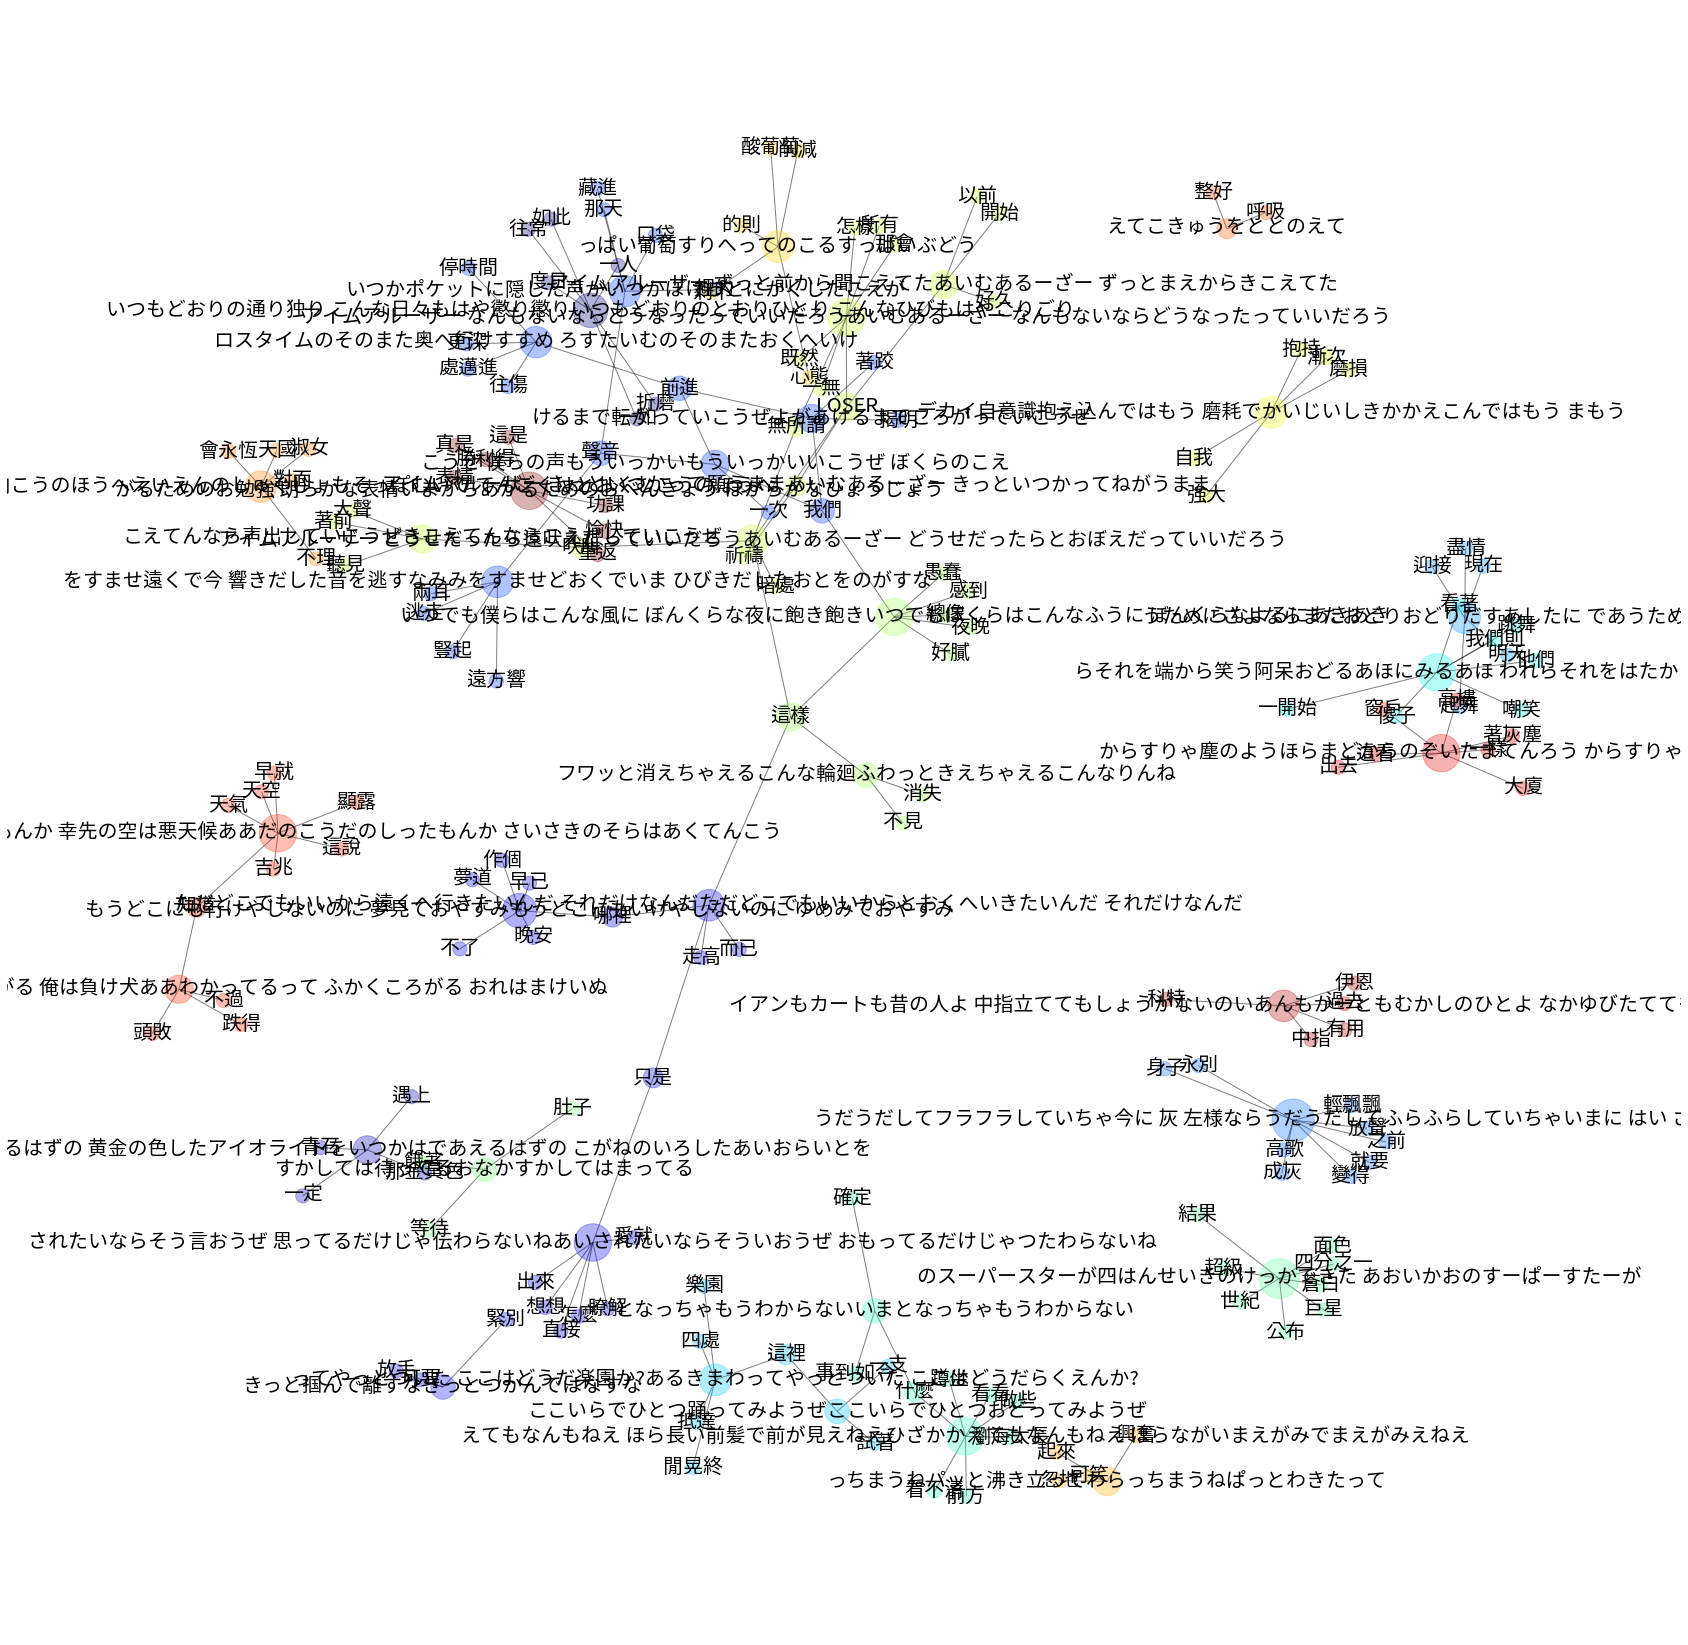

In [15]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()